### Required Assignment 12.3: Confusion Matrices and Metrics for Classification

This activity focuses on using confusion matrices to compute different classification metrics.  You will use scikit-learn to generate the confusion matrices and answer questions about the appropriate metric for the given dataset.  

**Expected Time: 60 Minutes**

**Total Points: 50**

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn import set_config
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")

### The Data

For this exercise you will explore two different scenarios.  The first is a built-in dataset from scikit-learn related to breast cancer tumors.  The second is a dataset representing telecommunications customer data and retention.  

**Cancer Description**

```
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.
```

**Telecommnunications Churn Data**

```
This data set contains information on communication company customers.  The target feature is whether or not the customer abandoned their subscription or were "churned".  The features primarily represent information about the customers' useage.
```

In [2]:
cancer = load_breast_cancer(as_frame=True)
cancer_df = cancer.frame

In [3]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
churn = pd.read_csv('data/cell_phone_churn.csv').select_dtypes(['float', 'int', 'bool'])
churn.head()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_length  3333 non-null   int64  
 1   area_code       3333 non-null   int64  
 2   vmail_message   3333 non-null   int64  
 3   day_mins        3333 non-null   float64
 4   day_calls       3333 non-null   int64  
 5   day_charge      3333 non-null   float64
 6   eve_mins        3333 non-null   float64
 7   eve_calls       3333 non-null   int64  
 8   eve_charge      3333 non-null   float64
 9   night_mins      3333 non-null   float64
 10  night_calls     3333 non-null   int64  
 11  night_charge    3333 non-null   float64
 12  intl_mins       3333 non-null   float64
 13  intl_calls      3333 non-null   int64  
 14  intl_charge     3333 non-null   float64
 15  custserv_calls  3333 non-null   int64  
 16  churn           3333 non-null   bool   
dtypes: bool(1), float64(8), int64(8)


In [7]:
churn_x, churn_y = churn.drop('churn', axis = 1), churn.churn
churn_x_train, churn_x_test, churn_y_train, churn_y_test = train_test_split(churn_x, churn_y, random_state = 42)

In [8]:
cancer_x, cancer_y = cancer.data, cancer.target
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancer_x, cancer_y, random_state=42)

[Back to top](#-Index)

### Problem 1

#### Pipeline for cancer data

**10 Points**

As before, you want to scale your data prior to building the model.  Because the cancer dataset contains only numeric features, you can simply pass all features through the `StandardScaler`.  Below, construct a pipeline named `cancer_pipeline` with named steps `scale` and `knn`.  Leave all the settings to default in the `KNeighborsClassifier`. 

Next, use the `fit` function on `cancer_pipeline` to train the pipeline on the training data.

Finally, use the `predict` function to make predictions on the test data.  Assign these as an array to `cancer_preds` below. 

In [9]:
### GRADED

cancer_pipeline = Pipeline([("scale", StandardScaler()),("knn",KNeighborsClassifier())])
cancer_pipeline.fit(cancer_x_train,cancer_y_train)
cancer_preds = cancer_pipeline.predict(cancer_x_test)

# YOUR CODE HERE
#raise NotImplementedError()

# Answer check
print(cancer_preds[:5])
cancer_pipeline

[1 0 0 1 1]


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

[Back to top](#-Index)

### Problem 2

#### Confusion matrix for cancer data

**10 Points**

Use the `confusion_matrix` function with arguments `cancer_y_test`, `cancer_preds` and with `labels` equal to `[1, 0]` to compute the confusion matrix of your predictions. Assign the result to `cancer_confusion_mat`.

Next, use the `ConfusionMatrixDisplay` function to visualize your confusion matrix on the test data.  Note that in the example of the cancer data a 1 means benign and 0 means malignant.  Use these by setting `display_labels = ['benign', 'malignant']`.  Assign your result to the object `dist` below.

In [10]:
### GRADED

cancer_confusion_mat = confusion_matrix(cancer_preds,cancer_y_test,  labels = [1,0])

# YOUR CODE HERE
#raise NotImplementedError()

# Answer check
print(type(cancer_confusion_mat))
print(cancer_confusion_mat)

<class 'numpy.ndarray'>
[[86  3]
 [ 3 51]]
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


[Back to top](#-Index)

### Problem 3

#### Which Errors are worse?

**5 Points**

In this problem, which of the errors would you care more about avoiding?  Those tumors that are identified as malignant but are benign, or those that are benign classified as malignant.  Consider this from the doctor's point of view.  Assign your answer as the string `false positive` (classified malignant but benign) or `false negative` (classified as benign but malignant) to `ans3` below.

In [11]:
### GRADED

ans3 = 'false negative'

# YOUR CODE HERE
#raise NotImplementedError()

# Answer check
print(ans3)

false negative


[Back to top](#-Index)

### Problem 4

#### Adjusting the Decision Boundary

**10 Points**

Consider improving the recall score.  By adjusting your decision boundary you can alter the recall.  Below, a new model is fit with `n_neighbors = 10` and predictions with both lower and higher decision boundaries.  Use these to decide which was better in the case of avoiding misclassifying tumors that are malignant as benign.  Select the choice 'a', 'b', or 'c' based on the confusion matrices below and assign to `best_knn` below.

In [17]:
knn_ex = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_ex.fit(cancer_x_train, cancer_y_train)
low_preds = np.where(knn_ex.predict_proba(cancer_x_test)[:, 1] > .25, 1, 0)
high_preds = np.where(knn_ex.predict_proba(cancer_x_test)[:, 1] > .95, 1, 0)
mid_preds = knn_ex.predict(cancer_x_test)

![](images/three_knn.png)

In [12]:
### GRADED

best_knn = 'c'

# YOUR CODE HERE
#raise NotImplementedError()

# Answer check
print(best_knn)

c


[Back to top](#-Index)

### Problem 5

#### Cell Phone Churn 

**10 Points**

In the example of the cell phone churn data, consider the problem of investing in customer incentives.  Here, you'd prefer to target customers who will likely churn.  


Below, construct a pipeline named `churn_pipeline` with named steps `scale` and `knn`.  In the KNN classifier, set `n_neighbors=10`. 

Next, use the `fit` function on `cchurn_pipeline` to train the pipeline on the training data.

Next, use the `plot_confusion_matrix` function with aruguments `churn_pipe`, `churn_x_test` and `churn_y_test`. Assign the result to ``churn_confusion_mat``


To begin, use the given training data -- `churn_x_train`, `churn_y_train` -- to build a pipeline named `churn_pipe` with named steps `scale` and `knn` that use `StandardScaler` and `KNeighborsClassifier` with `n_neighbors = 10` to scale and estimate the data.  Visualize your predictions using the `ConfusionMatrixDisplay.from_estimator` function and assign as `churn_confusion_mat`.  

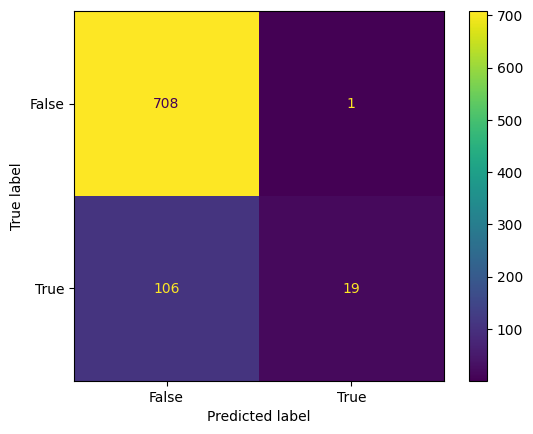

In [18]:
### GRADED

churn_pipe = Pipeline([('scale',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=10))])
churn_pipe.fit(churn_x_train, churn_y_train)
#churn_preds = churn_pipe.predict(churn_x_test)
#ConfusionMatrixDisplay(confusion_matrix(churn_preds,churn_y_test)).plot()
churn_confusion_mat = ConfusionMatrixDisplay.from_estimator(churn_pipe,churn_x_test,churn_y_test)
# YOUR CODE HERE
#raise NotImplementedError()

# Answer check
print(churn_confusion_mat)

[Back to top](#-Index)

### Problem 6

#### Adjusting the Decision Boundary

**5 Points**

Below, create predictions for the positive class that has thresholds of greater than 30% and 80%.  Compare these to your baseline predictions at 50% and identify which one minimizes the number of churns predicted as not churning.  Assign your answer as an integer to `ans6` below -- 30, 50, or 80.

30


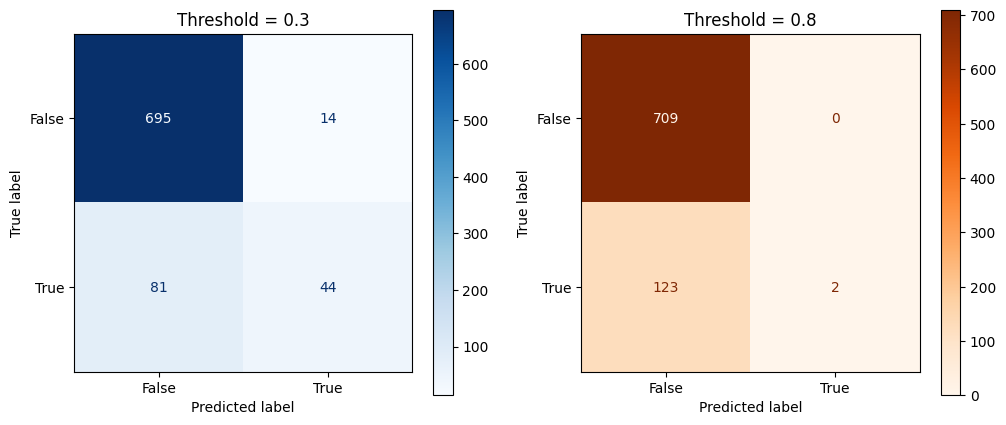

In [21]:
### GRADED

preda = churn_pipe.predict_proba(churn_x_test)
pred_30 = np.where(preda[:,1] >0.3, 1,0)
pred_80 = np.where(preda[:,1] >0.8, 1,0)
#ConfusionMatrixDisplay(confusion_matrix(pred_30,churn_y_test)).plot()
#ConfusionMatrixDisplay(confusion_matrix(pred_80,churn_y_test)).plot()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(
    churn_y_test,
    pred_30,  
    cmap="Blues", 
    ax=axes[0]
)
axes[0].set_title("Threshold = 0.3")

low_preds = np.where(knn_ex.predict_proba(cancer_x_test)[:, 1] > 0.25, 1, 0)
ConfusionMatrixDisplay.from_predictions(
    churn_y_test, 
    pred_80,
    cmap="Oranges", 
    ax=axes[1]
)
axes[1].set_title("Threshold = 0.8")
ans6 = 30

# YOUR CODE HERE
#raise NotImplementedError()

# Answer check
print(ans6)

While remembering the different metrics of precision, recall, and accuracy are important -- in part, they depend on what is considered positive or negative.  Using your confusion matrices can help intuit which metric is best for a specific scenario.   